# Data Processor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [2]:
def load_landsat_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # TODO: Extend to a class and to fecth on parameters.
        # Landsat images end with *_Band.tif
        file = next(path.glob(f'*_{band}.tif'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image

Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_14Aug2021_B4.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_14Aug2021_B3.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_14Aug2021_B2.tif


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


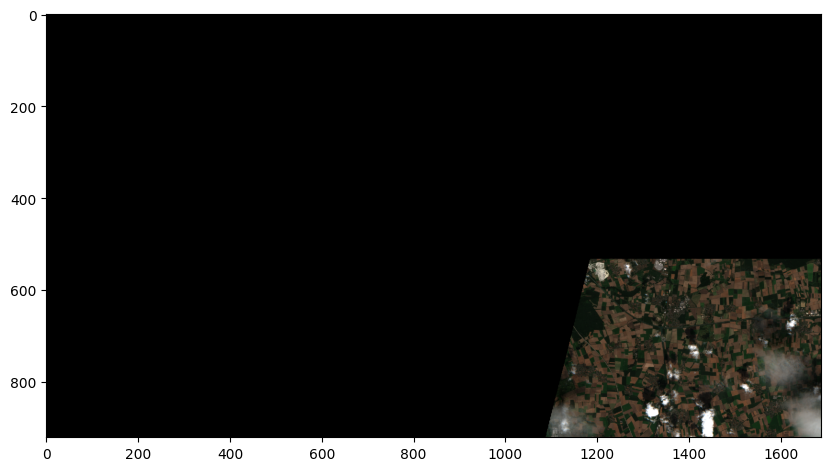

In [3]:
BASE_DIR = '/home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/'
bands =  ['B4','B3','B2']

image = load_landsat_image(BASE_DIR, bands)
def display_rgb(img, b_r, b_g, b_b, alpha=1., figsize=(10, 10)):
    rgb = np.stack([img[b_r], img[b_g], img[b_b]], axis=-1)
    rgb = rgb/rgb.max() * alpha
    plt.figure(figsize=figsize)
    plt.imshow(rgb)

# natural color
display_rgb(image, 'B4', 'B3', 'B2', alpha=2.)

In [4]:
img_stack = np.stack([image['B4'], image['B3'], image['B2']], axis=0)

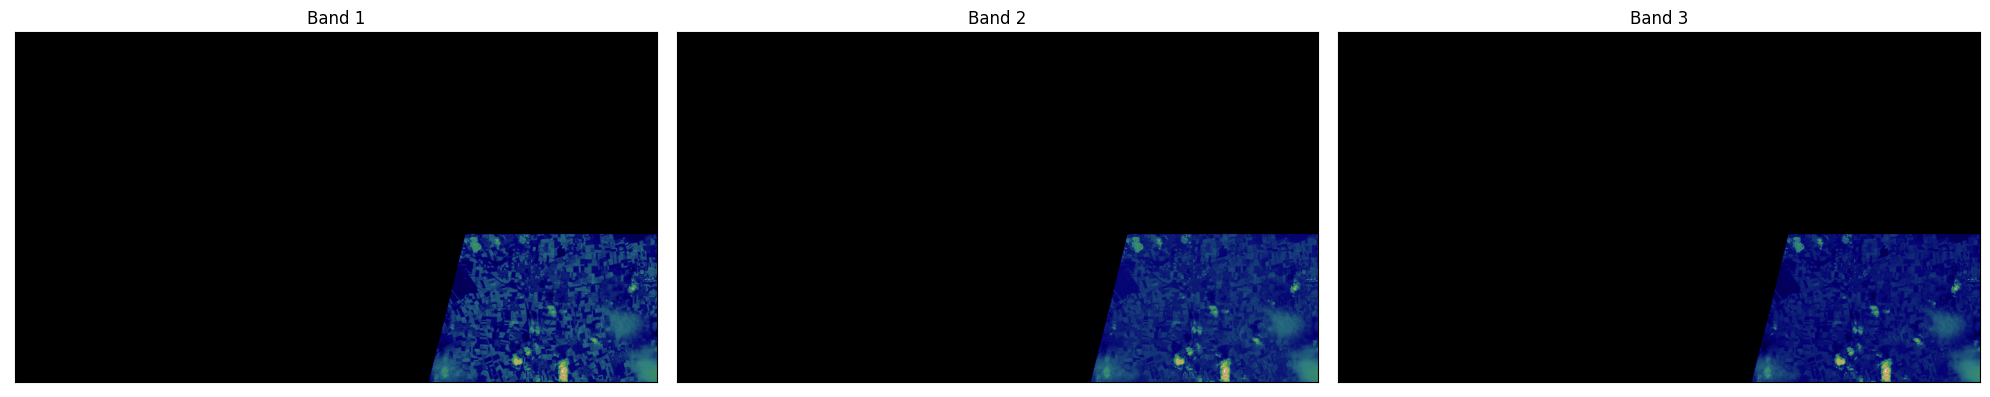

In [5]:
ep.plot_bands(img_stack, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 3, 
              cbar = False)
plt.show()

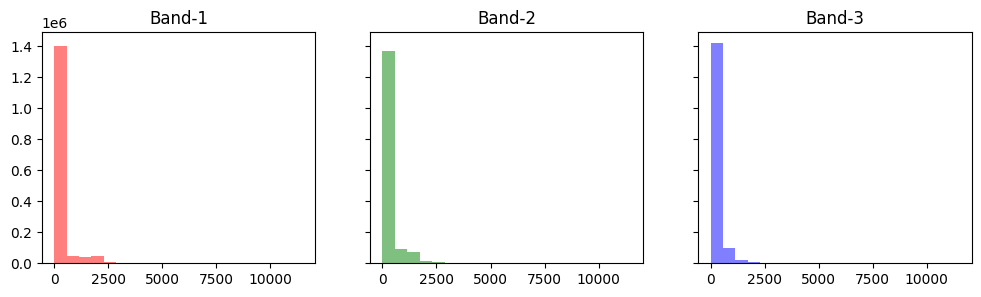

In [6]:
colors = ['red', 'green', 'blue']

ep.hist(img_stack, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 4)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 3))

plt.show()

In [7]:
image

{'B4': array([[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ..., 3492, 3466, 3466],
        [   0,    0,    0, ..., 3527, 3421, 3424],
        [   0,    0,    0, ..., 3482, 3472, 3477]], dtype=int32),
 'B3': array([[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ..., 3560, 3507, 3546],
        [   0,    0,    0, ..., 3582, 3519, 3538],
        [   0,    0,    0, ..., 3586, 3494, 3533]], dtype=int32),
 'B2': array([[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ..., 3519, 3374, 3379],
        [   0,    0,    0, ..., 3424, 3368, 3378],
        [   0,    0,    0, ..., 3394, 3354, 33